# Практика №5
## Проста лінійна регресія. Метод найменших квадратів.

In [2]:
# імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### Генерування даних для навчання моделі

In [3]:
X, Y = make_regression(n_samples=300, n_features=1, n_informative=1,
                       noise=5, random_state=10)

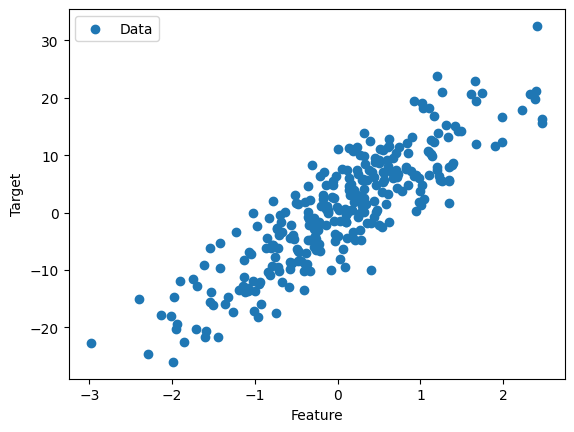

In [4]:
plt.scatter(X, Y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [5]:
print(X.shape)

(300, 1)


In [6]:
print(Y.shape)

(300,)


#### Завдання №1

*Мета*: знаючи характер функціональної залежності, підібрати її параметри так, щоб вона найкраще описувала експериментальні дані $y_i$.

Розглянемо на прикладі простої лінійної функції:
$$f(x) = \omega_1x + \omega_0$$

Для такої простої лінійної функції достатньо визначити лише два параметри $\omega_1$ та $\omega_0$ для того, щоб побудувати наближення лінійного графіка до експериментальних даних.

Одним з головних критеріїв апроксимації є сума квадратів помилок відхилень:
$$ E =  \sum_{i=1}^{N} (y_i - f(x_i))^2
$$

У методі найменших квадратів використовується мінімум суми квадратів помилок.

Знаходження параметрів виконується наступним чином:

$$ \omega_1 = \frac{\alpha_1 - m_xm_y}{\alpha_2 - m_x^2}$$

$$ \omega_0 = m_y - \omega_1 m_x$$

$$ \alpha_1 = \frac{1}{N}\sum_{i=1}^{N} y_ix_i$$

$$ \alpha_2 = \frac{1}{N}\sum_{i=1}^{N} x_i^2 $$

$$ m_x =  \frac{1}{N}\sum_{i=1}^{N} x_i $$

$$ m_y =  \frac{1}{N}\sum_{i=1}^{N} y_i $$

Наприкінці вивести отримані значення параметрів моделі і результат у вигляді вписаної прямої представити на графіку.

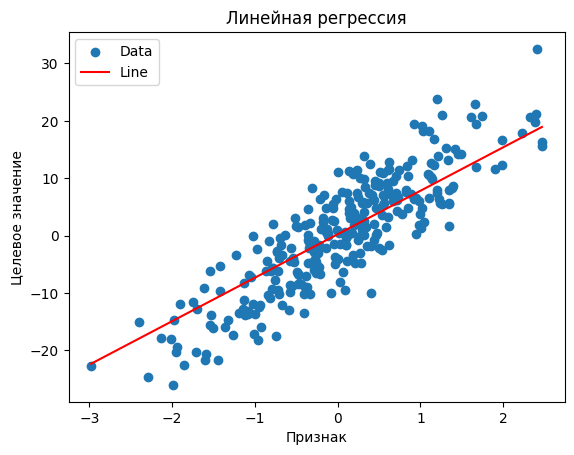

In [7]:
X, Y = make_regression(n_samples=300, n_features=1, n_informative=1, noise=5, random_state=10)

N = len(Y)
m_x = np.mean(X)
m_y = np.mean(Y)

alpha_1 = np.sum(Y * X) / N
alpha_2 = np.sum(X**2) / N

omega_1 = (alpha_1 - m_x * m_y) / (alpha_2 - m_x**2)
omega_0 = m_y - omega_1 * m_x

plt.scatter(X, Y, label='Data')
plt.xlabel('Признак')
plt.ylabel('Целевое значение')

x_line = np.linspace(X.min(), X.max(), 100)
y_line = omega_1 * x_line + omega_0
plt.plot(x_line, y_line, color='red', label='Line')


plt.legend()
plt.title('Линейная регрессия')
plt.show()

#### Завдання №2

Побудуйте модель лінійної регресії за допомогою модуля *LinearRegression*. Виведіть отримані параметри моделі і порівняйте їх зі своєю реалізацією.


Параметр ω1 (sklearn): 9.157446229603474
Параметр ω0 (sklearn): 0.17726756904466923

Сравнение параметров:
Параметр ω1 (ваша реализация): 7.574170409211588
Параметр ω0 (ваша реализация): 0.24308344049966868


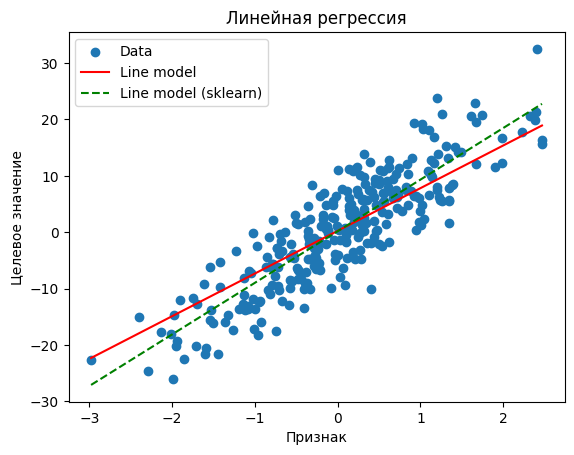

In [36]:
model = LinearRegression()
model.fit(X, Y)

omega_1_sklearn = model.coef_[0]
omega_0_sklearn = model.intercept_

print(f'Параметр ω1 (sklearn): {omega_1_sklearn}')
print(f'Параметр ω0 (sklearn): {omega_0_sklearn}')

print("\nСравнение параметров:")
print(f'Параметр ω1: {omega_1}')
print(f'Параметр ω0: {omega_0}')

plt.scatter(X, Y, label='Data')
plt.xlabel('Признак')
plt.ylabel('Целевое значение')

plt.plot(x_line, y_line, color='red', label='Line model')

y_line_sklearn = omega_1_sklearn * x_line + omega_0_sklearn
plt.plot(x_line, y_line_sklearn, color='green', label='Line model (sklearn)', linestyle='--')

plt.legend()
plt.title('Линейная регрессия')
plt.show()